In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
# 2. Load the Dataset (using California Housing dataset)
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [3]:

# 3. Preprocess the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 4. Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)  # Reshape for single output
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [5]:
# 5. Build the Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

input_dim = X_train.shape[1]
model = RegressionModel(input_dim)

In [6]:
# 6. Define Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
# 7. Train the Model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 4.4853
Epoch [20/100], Loss: 3.9029
Epoch [30/100], Loss: 3.3756
Epoch [40/100], Loss: 2.8988
Epoch [50/100], Loss: 2.4690
Epoch [60/100], Loss: 2.0864
Epoch [70/100], Loss: 1.7539
Epoch [80/100], Loss: 1.4755
Epoch [90/100], Loss: 1.2538
Epoch [100/100], Loss: 1.0879


In [8]:
# 8. Evaluate the Model
with torch.no_grad():
    predicted = model(X_test_tensor)
    test_loss = criterion(predicted, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 1.0663


Test Loss: 1.0663


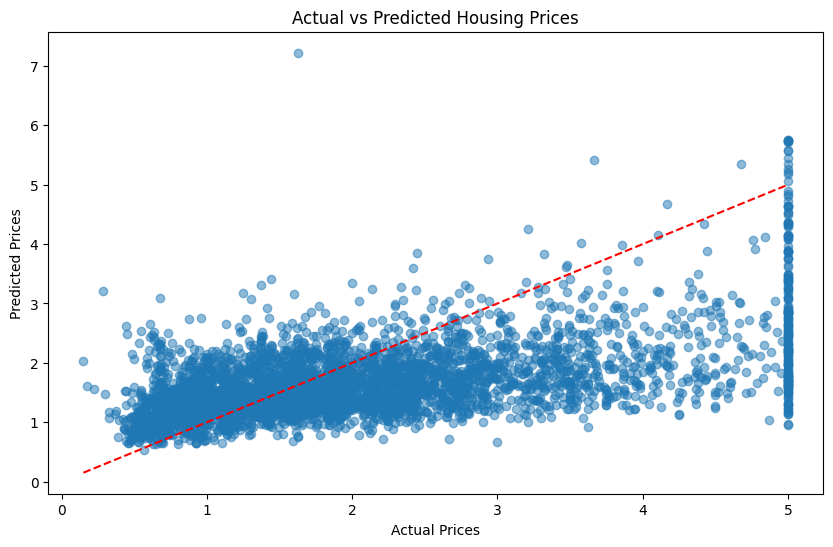

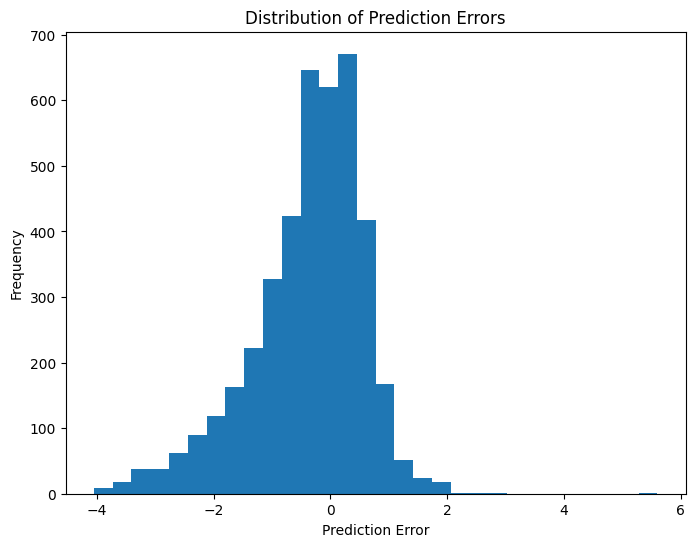

In [11]:
# prompt: add any graphs at below FOR above codes 2 or more

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# 8. Evaluate the Model
with torch.no_grad():
    predicted = model(X_test_tensor)
    test_loss = criterion(predicted, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    # 9. Plotting (Add these lines after evaluating the model)

    # Plot 1: Actual vs Predicted Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predicted.numpy(), alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Housing Prices")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
    plt.show()


    #Plot 2: Distribution of errors
    errors = predicted.numpy().flatten() - y_test
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=30)
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Distribution of Prediction Errors")
    plt.show()


In [13]:
# prompt: Try different numbers of layers and neurons.
# Experiment with different activation functions.
# Tune learning rates and batch sizes.
# Visualize loss reduction over epochs.

# ... (Your existing code) ...

# Experiment with different model architectures
def create_model(input_dim, hidden_layers, neurons_per_layer, activation):
    layers = []
    layers.append(nn.Linear(input_dim, neurons_per_layer))
    layers.append(activation)
    for _ in range(hidden_layers - 1):
        layers.append(nn.Linear(neurons_per_layer, neurons_per_layer))
        layers.append(activation)
    layers.append(nn.Linear(neurons_per_layer, 1))
    return nn.Sequential(*layers)

# Experiment parameters
hidden_layer_options = [1, 2]       # from 3 → 2 options
neuron_options = [64, 128]          # from 3 → 2 options
activation_options = [nn.ReLU()]    # from 3 → 1 option
learning_rate_options = [0.001, 0.01]  # from 3 → 2 options
batch_size_options = [64]           # from 3 → 1 option



best_model = None
best_loss = float('inf')

for hidden_layers in hidden_layer_options:
    for neurons in neuron_options:
        for activation in activation_options:
            for lr in learning_rate_options:
                for batch_size in batch_size_options:
                    # Create the model
                    model = create_model(input_dim, hidden_layers, neurons, activation)
                    # Define loss and optimizer
                    criterion = nn.MSELoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr)

                    # Training Loop (with batching)
                    losses = []
                    for epoch in range(num_epochs):
                        for i in range(0, len(X_train_tensor), batch_size):
                            X_batch = X_train_tensor[i:i+batch_size]
                            y_batch = y_train_tensor[i:i+batch_size]
                            # Forward pass
                            outputs = model(X_batch)
                            loss = criterion(outputs, y_batch)

                            # Backward pass and optimization
                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step()

                        losses.append(loss.item())

                    # Evaluation (on the whole test set)
                    with torch.no_grad():
                        predicted = model(X_test_tensor)
                        test_loss = criterion(predicted, y_test_tensor)

                    if test_loss < best_loss:
                        best_loss = test_loss
                        best_model = model

                    print(f"Hidden Layers: {hidden_layers}, Neurons: {neurons}, Activation: {activation.__class__.__name__}, LR: {lr}, Batch size: {batch_size}, Loss: {test_loss}")


# Use the best model for final evaluation and plotting
with torch.no_grad():
    predicted = best_model(X_test_tensor)
    test_loss = criterion(predicted, y_test_tensor)
    print(f"Best model Test Loss: {test_loss.item():.4f}")

    # ... (Your existing plotting code) ...


Hidden Layers: 1, Neurons: 64, Activation: ReLU, LR: 0.001, Batch size: 64, Loss: 0.3060891330242157
Hidden Layers: 1, Neurons: 64, Activation: ReLU, LR: 0.01, Batch size: 64, Loss: 0.29566940665245056
Hidden Layers: 1, Neurons: 128, Activation: ReLU, LR: 0.001, Batch size: 64, Loss: 0.2979336380958557
Hidden Layers: 1, Neurons: 128, Activation: ReLU, LR: 0.01, Batch size: 64, Loss: 0.30511918663978577
Hidden Layers: 2, Neurons: 64, Activation: ReLU, LR: 0.001, Batch size: 64, Loss: 0.26443764567375183
Hidden Layers: 2, Neurons: 64, Activation: ReLU, LR: 0.01, Batch size: 64, Loss: 0.3113243877887726
Hidden Layers: 2, Neurons: 128, Activation: ReLU, LR: 0.001, Batch size: 64, Loss: 0.27049291133880615
Hidden Layers: 2, Neurons: 128, Activation: ReLU, LR: 0.01, Batch size: 64, Loss: 0.31498926877975464
Best model Test Loss: 0.2644
